# Using KNN model

In [1]:
# Q 4.# 
# You are given a dataset which consists of the petal and sepal measurements of iris flowers
# The problem is to find the category of flower (Iris Setosa, Iris Virginica, Iris Versicolor) 
# given the measurements of a particular flower. [Create models using KNN and Naïve Bayes and find the best of the two models]
# Use python to prepare the data and create the models and cross-validate the dataset. 
# Please make sure you also use appropriate performance measures, error values, - 
# bias and variance to come to conclusion of the best dataset

import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

import matplotlib.pyplot as plt
%matplotlib inline

# Load the dataset

In [2]:
df = pd.read_csv('D:/AIML-L2/Iris_Q4.csv')

In [3]:
# Check data is loaded or not
df.head()

,sepallength,sepalwidth,petallength,petalwidth,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Data prepration

In [4]:
# Data prepration
    #  1. isnull
    #  2. any blank values
    #  3. datatypes
    #  4. describe data
    # 5. info
df.isnull().sum()

sepallength    0
sepalwidth     0
petallength    0
petalwidth     0
Class          0
dtype: int64

In [5]:
df.describe()

,sepallength,sepalwidth,petallength,petalwidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
df.head(4)

,sepallength,sepalwidth,petallength,petalwidth,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepallength    150 non-null float64
sepalwidth     150 non-null float64
petallength    150 non-null float64
petalwidth     150 non-null float64
Class          150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


# Chose the Feature and Target variables from dataset

In [8]:
# select the features and traget variable 

# features variable is sepallength, sepalwidth, petallength, petalwidth

x = df.drop(['Class'], axis=1)
x.head()

,sepallength,sepalwidth,petallength,petalwidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
# Traget variable Class

y = (df['Class'])
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Class, dtype: object

# Traget variable is contain char value need to convert in numric

In [10]:
# Make a dummy variable for column Class
#dummy = pd.get_dummies(df.Class)

In [11]:
#dummy.head()

In [12]:
df.head(101)

,sepallength,sepalwidth,petallength,petalwidth,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


# Replace the values for data 
# Iris-setosa, Iris-versicolor, Iris-virginica as 1, 2, 3

In [13]:
df['Class'].replace(["Iris-setosa","Iris-versicolor","Iris-virginica"], [1,2,3], inplace=True)

In [14]:
#df['Class'].replace(["Iris-setosa","Iris-virginica", "Iris-versicolor"], [1,2,3], inplace=True)

In [15]:
df.head(101)

,sepallength,sepalwidth,petallength,petalwidth,Class
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
5,5.4,3.9,1.7,0.4,1
6,4.6,3.4,1.4,0.3,1
7,5.0,3.4,1.5,0.2,1
8,4.4,2.9,1.4,0.2,1
9,4.9,3.1,1.5,0.1,1


In [16]:
# Now dataset is ready for modling


# Split the data into Train and Test data set

In [17]:
from sklearn.cross_validation import train_test_split # for split the data in train & test dataset

# our main data split into train and test
# the attribute test_size=0.3 splits the data into 70% and 30% ratio. train=70% and test=30%
x_train,x_test, y_train, y_test= train_test_split(x,y, test_size=0.3)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [18]:
x_train.shape


(105, 4)

In [19]:
x_test.shape

(45, 4)

In [20]:
# Traing data set

x_train.head()

,sepallength,sepalwidth,petallength,petalwidth
95,5.7,3.0,4.2,1.2
42,4.4,3.2,1.3,0.2
96,5.7,2.9,4.2,1.3
32,5.2,4.1,1.5,0.1
56,6.3,3.3,4.7,1.6


In [21]:
# Testing data set
x_test.head()

,sepallength,sepalwidth,petallength,petalwidth
146,6.3,2.5,5.0,1.9
103,6.3,2.9,5.6,1.8
148,6.2,3.4,5.4,2.3
21,5.1,3.7,1.5,0.4
122,7.7,2.8,6.7,2.0


In [22]:
# Training data set
y_train.head()

95    2
42    1
96    2
32    1
56    2
Name: Class, dtype: int64

In [23]:
# Testing data set
y_test.head()

146    3
103    3
148    3
21     1
122    3
Name: Class, dtype: int64

 # Now dataset is ready for modling

In [24]:
# This examines 3 neighbors for putting the data into class

model = KNeighborsClassifier(n_neighbors=3)


# Train your dataset using fit method

In [25]:
model.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

# Predict your model accuracy

In [26]:
Predict = model.predict(x_test)

In [27]:
# Print accuracy of KNN

# for checking the model accuracy
from sklearn import metrics

print('The Accuracy of KNN model', metrics.accuracy_score(Predict, y_test))


The Accuracy of KNN model 0.9111111111111111


# Check the accuracy for various values of n for K-Nearest nerighbours 

([<matplotlib.axis.XTick at 0x1b8d941e470>,
 <a list of 12 Text xticklabel objects>)

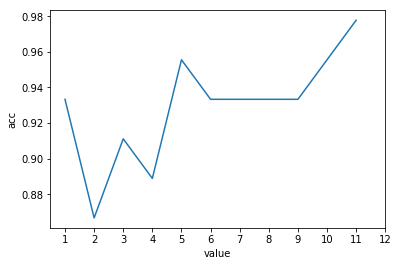

In [28]:
# Check the accuracy for various values of n for K-Nearest nerighbours
a_index = list(range(1,12))
a = pd.Series()
for i in list(range(1,12)):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train, y_train)
    prediction = model.predict(x_test)
    a = a.append(pd.Series(metrics.accuracy_score(prediction, y_test)))
    plt.xlabel('value')
    plt.ylabel('acc')
plt.plot(a_index, a)
x = [1,2,3,4,5,6,7,8,9,10,11,12]
plt.xticks(x)

# Using Naive Bayes 

In [53]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

In [54]:
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =0.2)

In [55]:
# Gaussian Naive-Bayes
gnb = GaussianNB()

In [56]:
# GaussianNB fit using fit methods
gnb.fit(x_train,y_train)

GaussianNB(priors=None)

In [57]:
prob_pos_gnb = gnb.predict_proba(x_test)[:, 1]
prob_pos_gnb

array([4.22795337e-02, 4.93195718e-03, 3.50043214e-07, 3.13283173e-14,
       7.02286260e-09, 2.08248409e-01, 5.77702012e-16, 9.99830992e-01,
       4.00520597e-11, 9.99947932e-01, 5.13950507e-15, 9.99687184e-01,
       8.00097618e-06, 9.99968542e-01, 8.75825945e-01, 4.04730229e-02,
       6.14679205e-07, 4.23547859e-17, 8.08914073e-01, 1.78412400e-13,
       9.94064925e-01, 9.95043952e-01, 1.89483404e-02, 2.26998387e-01,
       3.28392704e-03, 9.72073043e-01, 2.07222374e-05, 9.97267244e-01,
       9.99993043e-01, 9.97999868e-01, 9.99951954e-01, 9.62788356e-06,
       4.45368542e-03, 1.93600801e-16, 1.64341472e-08, 9.96733432e-01,
       9.99992895e-01, 9.99997244e-01, 5.64776859e-17, 1.30820519e-14,
       9.99999818e-01, 9.99999800e-01, 2.93717647e-01, 6.42920653e-04,
       9.93146831e-01])

In [58]:
#gnb_score = brier_score_loss(y_test, prob_pos_gnb)
#nb_score

In [59]:
# Belwo is the flower for x_test data set
y_pred = gnb.predict(x_test)
y_pred

array([3, 3, 3, 1, 3, 3, 1, 2, 1, 2, 1, 2, 3, 2, 2, 3, 3, 1, 2, 1, 2, 2,
       3, 3, 3, 2, 3, 2, 2, 2, 2, 3, 3, 1, 1, 2, 2, 2, 1, 1, 2, 2, 3, 3,
       2], dtype=int64)

In [60]:
#score = y_pred.score(x_test, y_test)
#score

In [38]:
# check the what is x-test is holding values
x_test

,sepallength,sepalwidth,petallength,petalwidth
146,6.3,2.5,5.0,1.9
103,6.3,2.9,5.6,1.8
148,6.2,3.4,5.4,2.3
21,5.1,3.7,1.5,0.4
122,7.7,2.8,6.7,2.0
123,6.3,2.7,4.9,1.8
17,5.1,3.5,1.4,0.3
87,6.3,2.3,4.4,1.3
44,5.1,3.8,1.9,0.4
94,5.6,2.7,4.2,1.3
